<a href="https://colab.research.google.com/github/pullz6/Anime_Recommendor/blob/main/Anime_Recs_Model_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anime Recommendor Model

In [9]:
!pip install kaggle

Getting the Kaggle Dataset of Anime

In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [12]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## Changing the dataset

In [13]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
! kaggle datasets download -d dbdmobile/myanimelist-dataset

Dataset URL: https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset
License(s): DbCL-1.0
... resuming from 1862270976 bytes (68004931 bytes left) ...
100% 1.80G/1.80G [00:02<00:00, 30.0MB/s]
100% 1.80G/1.80G [00:02<00:00, 22.8MB/s]


In [15]:
! unzip myanimelist-dataset.zip

Archive:  myanimelist-dataset.zip
  inflating: anime-dataset-2023.csv  
  inflating: anime-filtered.csv      
  inflating: final_animedataset.csv  
  inflating: user-filtered.csv       
  inflating: users-details-2023.csv  
  inflating: users-score-2023.csv    


In [16]:
df_new = pd.read_csv('anime-dataset-2023.csv')

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

<Axes: ylabel='Genres'>

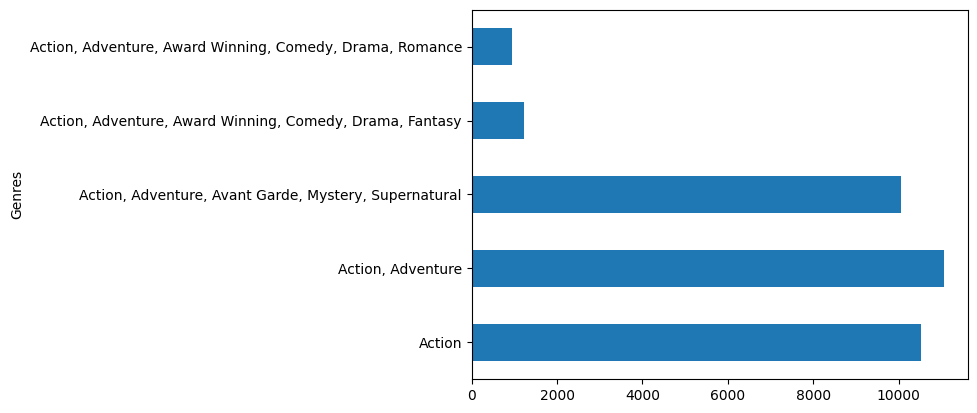

In [18]:
#Plotting Some EDA
df_new.groupby('Genres')['Popularity'].mean().head(5).plot(kind='barh')

In [19]:
def extract_all_values(list_items):
  '''This function is used extract genres from all the genres for a certain items'''
  all_genres = []
  for item in list_items:
    all = item.split(', ')
    for spec_item in all:
      if spec_item in all_genres:
        continue
      else:
        all_genres.append(spec_item)
  return all_genres
all_genres = extract_all_values(df_new['Genres'].tolist())

In [20]:
all_genres

['Action',
 'Award Winning',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Mystery',
 'Supernatural',
 'Fantasy',
 'Sports',
 'Comedy',
 'Romance',
 'Slice of Life',
 'Suspense',
 'Ecchi',
 'Gourmet',
 'Avant Garde',
 'Horror',
 'Girls Love',
 'Boys Love',
 'Hentai',
 'UNKNOWN',
 'Erotica']

In [21]:
df_new.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [22]:
def genre_check(row, string_value):
  '''This function allocates 1 value per each genre column'''
  placer = []
  all = row['Genres'].split(', ')
  for spec_item in all:
    if string_value in spec_item:
      placer=1
      break
    else:
      placer=0
  return placer

df_new['Action'] = df_new.apply(lambda row: genre_check(row,'Action'), axis=1)
df_new['Award_Winning'] = df_new.apply(lambda row: genre_check(row,'Award Winning'), axis=1)
df_new['Sci-Fi'] = df_new.apply(lambda row: genre_check(row,'Sci-Fi'), axis=1)
df_new['Drama'] = df_new.apply(lambda row: genre_check(row,'Drama'), axis=1)
df_new['Mystery'] = df_new.apply(lambda row: genre_check(row,'Mystery'), axis=1)
df_new['Supernatural'] = df_new.apply(lambda row: genre_check(row,'Supernatural'), axis=1)
df_new['Fantasy'] = df_new.apply(lambda row: genre_check(row,'Fantasy'), axis=1)
df_new['Sports'] = df_new.apply(lambda row: genre_check(row,'Sports'), axis=1)
df_new['Comedy'] = df_new.apply(lambda row: genre_check(row,'Comedy'), axis=1)
df_new['Romance'] = df_new.apply(lambda row: genre_check(row,'Romance'), axis=1)
df_new['Slice of Life'] = df_new.apply(lambda row: genre_check(row,'Slice of Life'), axis=1)
df_new['Suspense'] = df_new.apply(lambda row: genre_check(row,'Suspense'), axis=1)
df_new['Ecchi'] = df_new.apply(lambda row: genre_check(row,'Ecchi'), axis=1)
df_new['Gourmet'] = df_new.apply(lambda row: genre_check(row,'Gourmet'), axis=1)
df_new['Avant_Garde'] = df_new.apply(lambda row: genre_check(row,'Avant Garde'), axis=1)
df_new['Horror'] = df_new.apply(lambda row: genre_check(row,'Horror'), axis=1)
df_new['Girls Love'] = df_new.apply(lambda row: genre_check(row,'Girls Love'), axis=1)
df_new['Boys Love'] = df_new.apply(lambda row: genre_check(row,'Boys Love'), axis=1)
df_new['Erotica'] = df_new.apply(lambda row: genre_check(row,'Erotica'), axis=1)
df_new['UNKOWN'] = df_new.apply(lambda row: genre_check(row,'UNKOWN'), axis=1)

Creating LSTM to associate genres and synopsis relationship

In [23]:
! pip install nltk
! pip install gensim

SBERT

In [24]:
!pip install -U sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [25]:
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

#Importing universal sentence encoder model
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_U = hub.load(module_url)
print("module %s loaded" % module_url)

def embed(input):
    return model_U(input)

#Creating the transformer model
model_t = SentenceTransformer('all-MiniLM-L6-v2')

# Creating and prepping the corpus with all the descriptions of the dataframe for the transformer
sentences_t = df_new['Synopsis']

#Prep the corpus for the USE model
sentences = df_new['Synopsis']
sentences = np.asarray(sentences)
sentences_u = np.expand_dims(sentences, axis=1)

#Input
test = "titans attacking through the wall, there is an army of soliders, eren."

#Print input
print('Test sentence:',test)

#Prep input for the transformer model
test_vec_t = model_t.encode([test])[0]

#Prep input for the USE model
test_u = []
test_u.append(test)
test_vec_u = embed(test_u)

#Creating holding arrays
similarity_anime = []
similarity_scores_t = []
similarity_scores_U = []

#Evaluating for the corpus and given input with the transformer model
i = 0
for sent in sentences_t:
    similarity_score = 1-distance.cosine(test_vec_t, model_t.encode([sent])[0])
    similarity_anime.append(df_new.iloc[i, 2])
    similarity_scores_t.append(similarity_score)
    i = i + 1

#Evaluating for the corpus and given input with the USE model
i = 0
for sent in sentences_u:
    similarity_score = 1-distance.cosine(test_vec_u[0,:],embed(sent)[0,:])
    #print(f'\nFor {sent}\nSimilarity Score = {similarity_score} ')
    similarity_scores_U.append(similarity_score)
    i = i +1

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Test sentence: titans attacking through the wall, there is an army of soliders, eren.


In [26]:
final_df = pd.DataFrame()
final_df['Recommended_anime'] = similarity_anime
final_df['Recommended_score_T'] = similarity_scores_t
final_df['Recommended_score_U'] = similarity_scores_U

In [27]:
final_df.head()

,Recommended_anime,Recommended_score_T,Recommended_score_U
0,Cowboy Bebop,0.212533,0.119171
1,Cowboy Bebop: The Movie,0.196736,0.147107
2,Trigun,0.212286,0.184674
3,Witch Hunter Robin,0.111313,0.222805
4,Beet the Vandel Buster,0.339749,0.261051


In [29]:
final_df['AVG_Score'] = (final_df['Recommended_score_T'] + final_df['Recommended_score_U'])/2

In [31]:
final_df.sort_values(by='AVG_Score', ascending=False, inplace=True)

In [32]:
final_df.head()

,Recommended_anime,Recommended_score_T,Recommended_score_U,AVG_Score
9352,Attack on Titan Season 2,0.662499,0.605598,0.634049
7428,Attack on Titan,0.632358,0.615658,0.624008
13176,Attack on Titan Season 3,0.624221,0.551391,0.587806
13721,Attack on Titan: The Roar of Awakening,0.589315,0.528783,0.559049
12776,Attack on Skytree,0.475211,0.574288,0.524750


Creating USE (Universal Sentence Encoder)